## Data Mining and Sentiment Analysis using NLTK

In [473]:
#Import necessary modules 
import sqlite3 
import pandas as pd
import nltk


In [474]:
#Connect to sqlite database 'newArticle.db'
conn = sqlite3.connect("newsArticle.db")

In [475]:
# Import scraped data columns 'topic' and 'body'.
df_1=pd.read_sql_query("select topic,body from articles",conn)
df_1.info()

#pd.options.mode.chained_assignment Can be set to None, "warn", or "raise". "warn" is the default.
# None will suppress the warning entirely, and "raise" will throw a SettingWithCopyError
pd.options.mode.chained_assignment = None

#Delete duplicate rows based on 'body' column. We use this copy of the data frame in the analysis in the rows below.
df=df_1.drop_duplicates(subset=['body'], keep=False)
print(len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   124 non-null    object
 1   body    124 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB
114


In [476]:
# Data transformation
# the astype() metod transforms the data into strings
df['body'] = df['body'].astype(str).str.lower()
print(len(df['body']))
df.head(5)



114


,topic,body
0,Natural Resources,companiespioneer natural resources cofollowcot...
2,Natural Resources,nov 3 (reuters) - canadian natural resources l...
6,Natural Resources,june 1 (reuters) - global natural gas markets ...
7,Natural Resources,companiespioneer natural resources cofollowden...
8,Natural Resources,may 5 (reuters) - u.s. forecasts anticipating ...


### Tokenization

In [477]:
#Tokenization is splitting up body of the text into smaller lines and words.
# NLTK’s RegexpTokenizer imported and used to perform tokenization in combination with regular expressions.
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Stop words are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).
nltk.download('stopwords')

# Make a list of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
print(len(stop_words))

# Extend the list with own custom stopwords
my_stopwords = ['https','could','years','not','prices','price','would','can','thursday','monday','wednesday','central','people','article','reuters']
stop_words.update(my_stopwords)
print(len(stop_words))

# \w+ matches 1 or more word characters (same as [a-zA-Z0-9_]+).This means most characters that can be part of a word in any language, as well as numbers and the underscore.
regexp = RegexpTokenizer('\w+')
df['body_token']=df['body'].apply(regexp.tokenize)

#Remove stopwords from the scraped articles
df['body_token'] = df['body'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])
print(df['body_token'])


{'then', 'didn', 'whom', 'who', 'when', 'most', 've', 'wasn', 'won', 'yours', 'from', 'in', 'down', "didn't", 'such', "hadn't", "shan't", 't', "wasn't", 'than', 'been', 'why', 'of', 'what', 'through', 'above', 'as', 'ain', 'it', 'do', 'until', 'for', 'to', 'hers', 'aren', 'those', "won't", 'be', 'some', 'up', 'doing', 'which', 'their', 'further', 'again', 'about', 'out', 'd', 'shouldn', 'mustn', 'shan', 'if', 'is', "isn't", 'its', 'the', 'while', 'own', 'y', 'between', 'his', "weren't", 'himself', 'once', "she's", 'hasn', 'he', 'now', 'had', 'all', 'where', "you're", 'by', 'were', 's', 'same', 'too', 'myself', 'can', 'these', 'they', 'an', 'and', 'nor', 'you', 'isn', 'against', 'both', "that'll", 'each', 'yourselves', 'itself', "you'd", 'll', 'will', "wouldn't", 'o', 'theirs', 'mightn', 'hadn', 'yourself', "you'll", 'here', 'should', "should've", 'ours', 'being', 'below', 'how', 'a', 'off', "mightn't", 'just', 'we', 'ma', 'did', 'very', "don't", 'over', 'weren', 'during', 'on', "haven'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [companiespioneer, natural, resources, cofollo...
2      [nov, canadian, natural, resources, ltd, raise...
6      [june, global, natural, gas, markets, going, s...
7      [companiespioneer, natural, resources, cofollo...
8      [may, forecasts, anticipating, oil, production...
                             ...                        
119    [share, facebookshare, twittershare, linkedin,...
120    [share, facebookshare, twittershare, linkeding...
121    [share, facebookshare, twittershare, linkeding...
122    [share, facebookshare, twittershare, linkedinj...
123    [share, facebookshare, twittershare, linkedint...
Name: body_token, Length: 114, dtype: object


In [478]:
#Remove infrequent words.
# First change the format of body_token to strings and keep only words which are longer than 5 letters
df['body_string'] = df['body_token'].apply(lambda x: ' '.join([item for item in x if len(item)>5]))

# Prints the row article text, token and strings which contain more than 5 letters 
df[['body', 'body_token', 'body_string']].head()

,body,body_token,body_string
0,companiespioneer natural resources cofollowcot...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowcot...
2,nov 3 (reuters) - canadian natural resources l...,"[nov, canadian, natural, resources, ltd, raise...",canadian natural resources raised dividend bea...
6,june 1 (reuters) - global natural gas markets ...,"[june, global, natural, gas, markets, going, s...",global natural markets structural change execu...
7,companiespioneer natural resources cofollowden...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowden...
8,may 5 (reuters) - u.s. forecasts anticipating ...,"[may, forecasts, anticipating, oil, production...",forecasts anticipating production rising milli...


In [479]:
#Create a list of all words longer than 5 letter as specified above. 
all_words = ' '.join([word for word in df['body_string']])

#Tokenize the new article strings list created.
tokenized_words = nltk.tokenize.word_tokenize(all_words)


In [480]:
# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist


FreqDist({'inflation': 935, 'interest': 480, 'policy': 247, 'higher': 207, 'economic': 203, 'market': 194, 'federal': 171, 'monetary': 169, 'global': 158, 'section': 155, ...})

In [481]:
# We can use our fdist dictionary to drop words which occur less than a certain amount of times (usually a value of 3 or 4 but we use 10 here).

df['body_string_fdist'] = df['body_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 10 ]))
df[['body', 'body_token', 'body_string', 'body_string_fdist']].head()

,body,body_token,body_string,body_string_fdist
0,companiespioneer natural resources cofollowcot...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowcot...,natural resources energy likely executive offi...
2,nov 3 (reuters) - canadian natural resources l...,"[nov, canadian, natural, resources, ltd, raise...",canadian natural resources raised dividend bea...,natural resources raised analysts estimates qu...
6,june 1 (reuters) - global natural gas markets ...,"[june, global, natural, gas, markets, going, s...",global natural markets structural change execu...,global natural markets structural change execu...
7,companiespioneer natural resources cofollowden...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowden...,natural resources executive officer public nat...
8,may 5 (reuters) - u.s. forecasts anticipating ...,"[may, forecasts, anticipating, oil, production...",forecasts anticipating production rising milli...,forecasts production rising million aggressive...


## Lemmatization

In [482]:

# Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a 
# single item, identified by the word's lemma, or dictionary form.[Wikipedia]

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
df['body_string_lem'] = df['body_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal. This is to make sure that there are words to lemmatize.
df['is_equal']= (df['body_string_fdist']==df['body_string_lem'])

# show level count. Returns true and prints number of rows if the rows in every column is equal
df.is_equal.value_counts()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True    114
Name: is_equal, dtype: int64

## Frequency distribution

In [483]:
from nltk.probability import FreqDist
nltk.download('punkt')

#a new variable assigned to all lematized words
all_words_lem = ' '.join([word for word in df['body_string_lem']])
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [484]:
#Tokenize lematized words and display frequency distribution.
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

#Display most common words in the lematized word cluster
fd.most_common(5)
fd.tabulate(5)

inflation  interest    policy    higher  economic 
      935       480       247       207       203 


## Plot search words against their frequency of occurences in Plotly.
#### Add search words here if necessary

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_10064\1007004307.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.



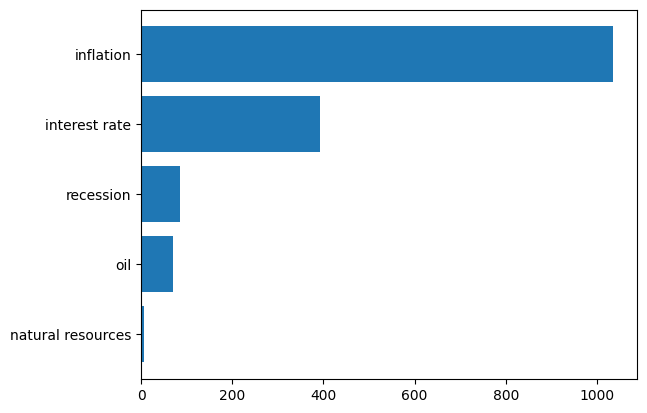

In [485]:
#Import plotly and plot the occurences of search words in the tokenized word list. 
#Import matplotlib and plot the occurences of searchwords in the tokenized word list. 
#The maximum value of 30 words to plot is given
import plotly.express as px
import matplotlib.pyplot as plt
# Define a list of phrases to search for and remove all non-letter characters from the column.Convert all letter to lowercase
phrases = ['natural resources','oil', 'inflation', 'interest rate','recession']

df['body'] = df['body'].str.replace('[^a-zA-Z\s]', '')

df['body'] = df['body'].str.lower()

# Count the occurrence frequencey of each phrase in the column
occurrences = []
for phrase in phrases:
    occurrences.append(df['body'].str.count(phrase).sum())
# Sort the phrases and occurrences lists in ascending order of occurrences
phrases_sorted = [phrase for _, phrase in sorted(zip(occurrences, phrases))]
occurrences_sorted = sorted(occurrences)

# Plot the occurrences as a horizontal bar chart in ascending order
plt.barh(phrases_sorted, occurrences_sorted)
plt.show()


In [486]:


topic_words = ['resources','interest','rate','inflation','recession','election,','corruption','drought','extreme temperatures'] # Add your topic words here

fdist = FreqDist([word for words in df['body_token'].values.tolist() for word in words if word in topic_words])

# Create pandas series to make plotting easier.Notice the tuples are converted to dict
freqdist = pd.Series(dict(fdist))
print(freqdist)

fig = px.bar(y=freqdist.index, x=freqdist.values, 
                title="Search words occurency frequency").update_layout(xaxis_title="Occurency frequency", yaxis_title="Search word")

# Sort values in ascending order
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

#Update the title of the graph to center
fig.update_layout(title_text='Search words occurency frequency', title_x=0.5)

# show plot
fig.show()

resources      14
recession      73
inflation     935
rate          513
interest      480
corruption      1
drought         3
dtype: int64


## Plot the most common words in Plotly

In [487]:
# Obtain top 10 words from the frequency distribution and return as tuples
top_10 = fd.most_common(10)
print(top_10)

# Create pandas series to make plotting easier.Notice the tuples are converted to dict
fdist = pd.Series(dict(top_10))

[('inflation', 935), ('interest', 480), ('policy', 247), ('higher', 207), ('economic', 203), ('market', 194), ('federal', 171), ('monetary', 169), ('global', 158), ('section', 155)]


In [488]:
# Plot most frequent words in the articles
#Show frequency of a specific word e.g inflation
fd["inflation","recession"]

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values in ascending order
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()



## Sentiment analysis using VADER

In [489]:
# NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [490]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize an object of SentimentIntensityAnalyzer with name “analyzer”
analyzer = SentimentIntensityAnalyzer()

In [491]:
# Polarity scores is a float within the range [-1.0, 1.0].
# Polarity of a text is summarised from the polarity of individual words(positive,negative,neutral).
# Polarity score is given for the lemmatized text
df['polarity'] = df['body_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,topic,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,polarity
121,Interest rate,share to facebookshare to twittershare to link...,"[share, facebookshare, twittershare, linkeding...",facebookshare twittershare linkedingood mornin...,facebookshare twittershare morning president f...,facebookshare twittershare morning president f...,True,"{'neg': 0.066, 'neu': 0.782, 'pos': 0.152, 'co..."
122,Interest rate,share to facebookshare to twittershare to link...,"[share, facebookshare, twittershare, linkedinj...",facebookshare twittershare linkedinjerome powe...,facebookshare twittershare powell chairman fed...,facebookshare twittershare powell chairman fed...,True,"{'neg': 0.019, 'neu': 0.855, 'pos': 0.126, 'co..."
123,Interest rate,share to facebookshare to twittershare to link...,"[share, facebookshare, twittershare, linkedint...",facebookshare twittershare linkedinthe federal...,facebookshare twittershare federal reserve rai...,facebookshare twittershare federal reserve rai...,True,"{'neg': 0.141, 'neu': 0.629, 'pos': 0.23, 'com..."


In [492]:
# Change data structure and drop topic and polarity columns and prepare for sentiment analysis
df = pd.concat(
    [df.drop([ 'topic', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(5)

,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,neg,neu,pos,compound
0,companiespioneer natural resources cofollowcot...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowcot...,natural resources energy likely executive offi...,natural resources energy likely executive offi...,True,0.047,0.747,0.206,0.7717
2,nov reuters canadian natural resources ltd c...,"[nov, canadian, natural, resources, ltd, raise...",canadian natural resources raised dividend bea...,natural resources raised analysts estimates qu...,natural resources raised analysts estimates qu...,True,0.031,0.697,0.272,0.9468
6,june reuters global natural gas markets are ...,"[june, global, natural, gas, markets, going, s...",global natural markets structural change execu...,global natural markets structural change execu...,global natural markets structural change execu...,True,0.053,0.740,0.208,0.9001
7,companiespioneer natural resources cofollowden...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowden...,natural resources executive officer public nat...,natural resources executive officer public nat...,True,0.070,0.685,0.246,0.8689
8,may reuters us forecasts anticipating oil pr...,"[may, forecasts, anticipating, oil, production...",forecasts anticipating production rising milli...,forecasts production rising million aggressive...,forecasts production rising million aggressive...,True,0.059,0.735,0.206,0.9081


In [493]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(5)


,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,companiespioneer natural resources cofollowcot...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowcot...,natural resources energy likely executive offi...,natural resources energy likely executive offi...,True,0.047,0.747,0.206,0.7717,positive
2,nov reuters canadian natural resources ltd c...,"[nov, canadian, natural, resources, ltd, raise...",canadian natural resources raised dividend bea...,natural resources raised analysts estimates qu...,natural resources raised analysts estimates qu...,True,0.031,0.697,0.272,0.9468,positive
6,june reuters global natural gas markets are ...,"[june, global, natural, gas, markets, going, s...",global natural markets structural change execu...,global natural markets structural change execu...,global natural markets structural change execu...,True,0.053,0.740,0.208,0.9001,positive
7,companiespioneer natural resources cofollowden...,"[companiespioneer, natural, resources, cofollo...",companiespioneer natural resources cofollowden...,natural resources executive officer public nat...,natural resources executive officer public nat...,True,0.070,0.685,0.246,0.8689,positive
8,may reuters us forecasts anticipating oil pr...,"[may, forecasts, anticipating, oil, production...",forecasts anticipating production rising milli...,forecasts production rising million aggressive...,forecasts production rising million aggressive...,True,0.059,0.735,0.206,0.9081,positive


## Visualize data

<Axes: xlabel='count', ylabel='sentiment'>

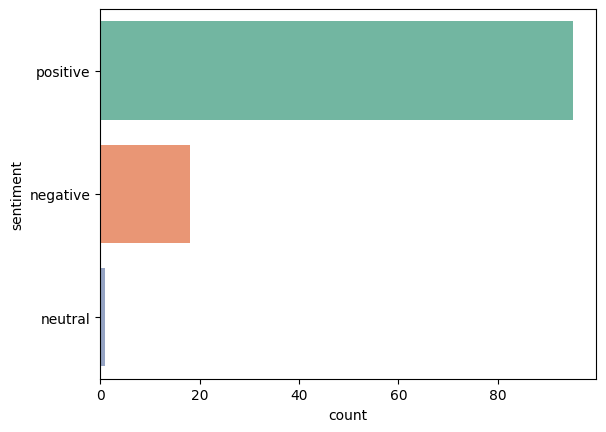

In [494]:
#Visualize data 
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
# count plot on single categorical variable of 'sentiment'
import seaborn as sns

sns.countplot(y='sentiment',  data=df, palette="Set2")